

## **Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ**

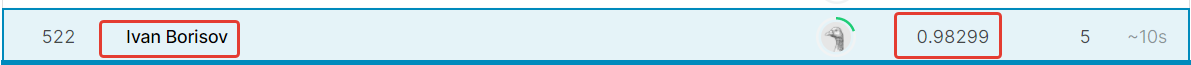

# Путешествие по Спрингфилду.


Сегодня вам предстоить помочь телекомпании FOX  в обработке их контента. Как вы знаете сериал Симсоны идет на телеэкранах более 25 лет и за это время скопилось очень много видео материала. Персоонажи менялись вместе с изменяющимися графическими технологиями   и Гомер 2018 не очень похож на Гомера 1989. Нашей задачей будет научиться классифицировать персонажей проживающих в Спрингфилде. Думаю, что нет смысла представлять каждого из них в отдельности.



 ![alt text](https://vignette.wikia.nocookie.net/simpsons/images/5/5a/Spider_fat_piglet.png/revision/latest/scale-to-width-down/640?cb=20111118140828)



### Установка зависимостей

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device, torch.cuda.is_available()

('cuda', True)

In [ ]:
# Более новая версия торча не совместима с ГПУ на видеокартах Colab
# https://pytorch.org/ 10.1
import torch
import torchvision
from os.path import exists
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'
print("\ndevice: ", device, "\nPyTorch Version: ", torch.__version__, "\nTorchvision Version: ", torchvision.__version__, \
    "\nПроверяем, доступны ли GPU: ", torch.cuda.is_available(), "\naccelerator: ", accelerator)
if torch.cuda.is_available() == False:
    !pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
else:
    pass
# Проверяем, доступны ли GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print("\ndevice: ", device, "\nPyTorch Version: ", torch.__version__, "\nTorchvision Version: ", torchvision.__version__, \
    "\nПроверяем, доступны ли GPU: ", torch.cuda.is_available(), "\naccelerator: ", accelerator)


device:  cuda 
PyTorch Version:  1.8.1+cu101 
Torchvision Version:  0.9.1+cu101 
Проверяем, доступны ли GPU:  True 
accelerator:  cu110

device:  cuda 
PyTorch Version:  1.8.1+cu101 
Torchvision Version:  0.9.1+cu101 
Проверяем, доступны ли GPU:  True 
accelerator:  cu110


In [ ]:
print(torch.__config__.show()) 
print(torch.version.cuda)
torch.cuda.is_available()

PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v1.7.0 (Git Hash 7aed236906b1f7a05c0917e5257a1af05e9ff683)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70
  - CuDNN 7.6.3
  - Magma 2.5.2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CUDA_VERSION=10.1, CUDNN_VERSION=7.6.3, CXX_COMPILER=/opt/rh/devtoolset-7/root/usr/bin/c++, CXX_FLAGS= -Wno-deprecated -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -fopenmp -DNDEBUG -DUSE_KINETO -DUSE_FBGEMM -DUSE_QNNPACK -DUSE_PYTORCH_QNNPACK -DUSE_XNNPACK -O2 -fPIC -Wno-narrowing -Wall -Wextra -Werror=return-type -Wno-missing-field-initializers -Wno-type-limits -Wno-arra

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/'My Drive'/'dataSpringfield'
!cp /content/drive/'My Drive'/'dataSpringfield'/journey-springfield.zip .
!unzip -q /content/drive/'My Drive'/'dataSpringfield'/journey-springfield.zip
!ls 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
journey-springfield.zip
replace characters_illustration.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
n
characters_illustration.png  label_encoder.pkl	    testset
drive			     sample_data	    train
fourth.csv		     sample_submission.csv
journey-springfield.zip      second.csv


In [ ]:
from torchvision import transforms, models
model = models.vgg16(pretrained=True)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
# нам необходима pillow  5.3.0
import PIL
if PIL.__version__ == '5.3.0':
    print('PIL',PIL.__version__)
else:
    !pip uninstall -y Pillow
    !pip install Pillow==5.3.0
print( '\nPIL',PIL.__version__, ' - здесь должна быть версия 5.3.0. если это не так перехгрузите данный ноутбук') 

PIL 5.3.0

PIL 5.3.0  - здесь должна быть версия 5.3.0. если это не так перехгрузите данный ноутбук


In [ ]:
!nvidia-smi
import torch
torch.cuda.is_available()

Fri Apr 23 10:52:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W /  70W |   9262MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

В нашем тесте будет 990 картнок, для которых вам будет необходимо предсказать класс.

In [ ]:
import pickle
import numpy as np
from skimage import io
from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path
from torchvision import transforms
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from matplotlib import colors, pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


In [ ]:
# разбиваем наш датасет на нужные выборки
DATA_MODES = ['train', 'val', 'test']
# все изображения будут приведены к 224x224
RESCALE_SIZE = 224
DEVICE = torch.device("cuda")

Ниже мы исспользуем враппер над датасетом для удобной работы. Вам стоит понимать, что происходит с LabelEncoder и  с torch.Transformation. 

ToTensor конвертирует  PIL Image с параметрами в диапазоне [0, 255] (как все пиксели) в FloatTensor размера (C x H x W) [0,1] , затем производится масштабирование:
$input = \frac{input - \mu}{\text{standard deviation}} $, <br>       константы - средние и дисперсии по каналам на основе ImageNet


Стоит также отметить, что мы переопределяем метод __getitem__ для удобства работы с данной структурой данных.
 Также используется LabelEncoder для преобразования строковых меток классов в id и обратно. В описании датасета указано, что картинки разного размера, так как брались напрямую с видео, поэтому следуем привести их к одному размер (это делает метод  _prepare_sample) 

In [ ]:
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
            ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [ ]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [ ]:
!ls train/simpsons_dataset
!ls testset/testset

abraham_grampa_simpson	  groundskeeper_willie	ned_flanders
agnes_skinner		  homer_simpson		nelson_muntz
apu_nahasapeemapetilon	  kent_brockman		otto_mann
barney_gumble		  krusty_the_clown	patty_bouvier
bart_simpson		  lenny_leonard		principal_skinner
carl_carlson		  lionel_hutz		professor_john_frink
charles_montgomery_burns  lisa_simpson		rainier_wolfcastle
chief_wiggum		  maggie_simpson	ralph_wiggum
cletus_spuckler		  marge_simpson		selma_bouvier
comic_book_guy		  martin_prince		sideshow_bob
disco_stu		  mayor_quimby		sideshow_mel
edna_krabappel		  milhouse_van_houten	snake_jailbird
fat_tony		  miss_hoover		troy_mcclure
gil			  moe_szyslak		waylon_smithers
img0.jpg    img24.jpg	img39.jpg   img549.jpg	img699.jpg  img848.jpg
img100.jpg  img250.jpg	img3.jpg    img54.jpg	img69.jpg   img849.jpg
img101.jpg  img251.jpg	img400.jpg  img550.jpg	img6.jpg    img84.jpg
img102.jpg  img252.jpg	img401.jpg  img551.jpg	img700.jpg  img850.jpg
img103.jpg  img253.jpg	img402.jpg  img552.jpg	img701.jpg  img

In [ ]:
TRAIN_DIR = Path('train/simpsons_dataset')
TEST_DIR = Path('testset/testset')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

len(train_val_files), len(test_files)

(20933, 991)

In [ ]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

In [ ]:
val_dataset = SimpsonsDataset(val_files, mode='val')

Давайте посмотрим на наших героев внутри датасета.

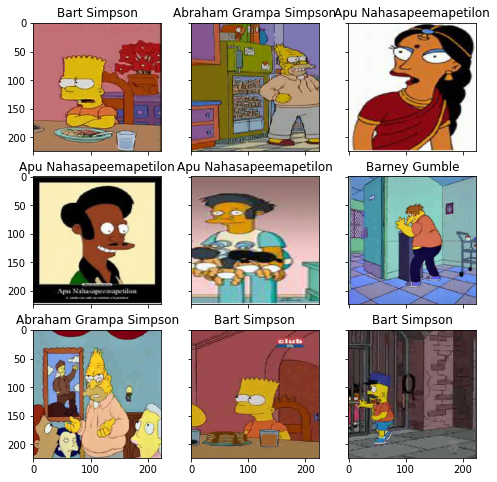

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

### Построение нейросети

Запустить данную сеть будет вашим мини-заданием на первую неделю, чтобы было проще участвовать в соревновании.

Данная архитектура будет очень простой и нужна для того, чтобы установить базовое понимание и получить простенький сабмит на Kaggle

<!-- Здесь вам предлагается дописать сверточную сеть глубины 4/5.  -->

*Описание слоев*:



1. размерность входа: 3x224x224 
2.размерности после слоя:  8x111x111
3. 16x54x54
4. 32x26x26
5. 64x12x12
6. выход: 96x5x5


In [ ]:
myModel = models.googlenet(pretrained=True)

In [ ]:
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [ ]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [ ]:
def train(train_files, val_files, model, criterion, epochs, batch_size,optimizer, scheduler, sampler = None, shuffle = True):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, sampler = sampler, num_workers = 4)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers = 4)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, optimizer)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            scheduler.step()
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [ ]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

## Сначала обучим наш гуглнет с "param.requires_grad = False", а потом с "param.requires_grad = True". Я так и не понял, почему это работает лучше, чем одиночный один из вариантов. Возможно, из-за этого лучше веса распределяются.

In [ ]:
n_classes = len(np.unique(train_val_labels))
for param in myModel.parameters():
  param.requires_grad = False

numFeat = myModel.fc.in_features
myModel.fc = nn.Linear(numFeat,n_classes)
myModel = myModel.to(DEVICE)
criterizator = nn.CrossEntropyLoss()
optimizator = torch.optim.AdamW(myModel.parameters())
shedulator = torch.optim.lr_scheduler.StepLR(optimizator,3,0.5)

Запустим обучение сети.

In [ ]:
if val_dataset is None:
    val_dataset = SimpsonsDataset(val_files, mode='val')
    
train_dataset = SimpsonsDataset(train_files, mode='train')

In [ ]:
history = train(train_dataset, val_dataset, model=myModel, criterion = criterizator, epochs=6, batch_size=128,optimizer = optimizator,scheduler = shedulator)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
epoch:   0%|          | 0/6 [00:00<?, ?it/s]

loss 2.5495844199191353


epoch:  17%|█▋        | 1/6 [01:54<09:34, 114.84s/it]


Epoch 001 train_loss: 2.5496     val_loss 2.0077 train_acc 0.3614 val_acc 0.5537
loss 1.7380189898059781


epoch:  33%|███▎      | 2/6 [03:49<07:38, 114.69s/it]


Epoch 002 train_loss: 1.7380     val_loss 1.5770 train_acc 0.6082 val_acc 0.6230
loss 1.414160242869798


epoch:  50%|█████     | 3/6 [05:42<05:42, 114.21s/it]


Epoch 003 train_loss: 1.4142     val_loss 1.3856 train_acc 0.6631 val_acc 0.6578
loss 1.2485443037538377


epoch:  67%|██████▋   | 4/6 [07:35<03:47, 113.80s/it]


Epoch 004 train_loss: 1.2485     val_loss 1.3035 train_acc 0.6979 val_acc 0.6676
loss 1.1761283986590776


epoch:  83%|████████▎ | 5/6 [09:28<01:53, 113.64s/it]


Epoch 005 train_loss: 1.1761     val_loss 1.2491 train_acc 0.7109 val_acc 0.6790
loss 1.1171937250955841


epoch: 100%|██████████| 6/6 [11:21<00:00, 113.65s/it]


Epoch 006 train_loss: 1.1172     val_loss 1.2054 train_acc 0.7221 val_acc 0.6836


Построим кривые обучения

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)

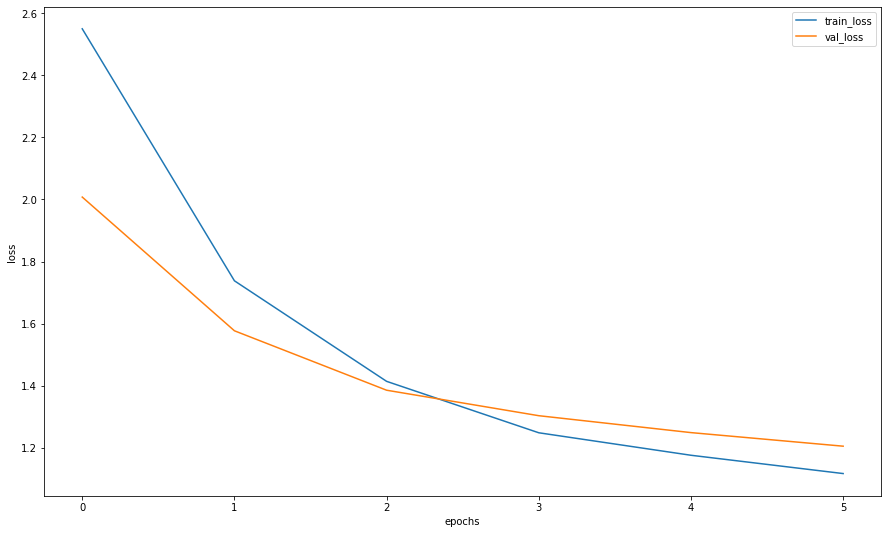

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
for param in myModel.parameters():
  param.requires_grad = True
history = train(train_dataset, val_dataset, model=myModel, criterion = criterizator, epochs=9, batch_size=128,optimizer = optimizator,scheduler = shedulator)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
epoch:   0%|          | 0/15 [00:00<?, ?it/s]

loss 0.4195292641994444


epoch:   7%|▋         | 1/15 [02:06<29:28, 126.29s/it]


Epoch 001 train_loss: 0.4195     val_loss 0.3056 train_acc 0.8880 val_acc 0.9154
loss 0.17161452018103712


epoch:  13%|█▎        | 2/15 [04:13<27:23, 126.43s/it]


Epoch 002 train_loss: 0.1716     val_loss 0.2585 train_acc 0.9528 val_acc 0.9320
loss 0.07731407838461563


epoch:  20%|██        | 3/15 [06:19<25:17, 126.47s/it]


Epoch 003 train_loss: 0.0773     val_loss 0.2725 train_acc 0.9803 val_acc 0.9389
loss 0.018267151732239174


epoch:  27%|██▋       | 4/15 [08:23<23:02, 125.65s/it]


Epoch 004 train_loss: 0.0183     val_loss 0.1924 train_acc 0.9954 val_acc 0.9576
loss 0.003459569365324214


epoch:  33%|███▎      | 5/15 [10:28<20:56, 125.62s/it]


Epoch 005 train_loss: 0.0035     val_loss 0.2036 train_acc 0.9994 val_acc 0.9603
loss 0.0015436718274750949


epoch:  40%|████      | 6/15 [12:37<18:57, 126.41s/it]


Epoch 006 train_loss: 0.0015     val_loss 0.2188 train_acc 0.9998 val_acc 0.9593
loss 0.0003173188356334369


epoch:  47%|████▋     | 7/15 [14:45<16:56, 127.03s/it]


Epoch 007 train_loss: 0.0003     val_loss 0.2038 train_acc 1.0000 val_acc 0.9641
loss 0.00016080551536331865


epoch:  53%|█████▎    | 8/15 [16:50<14:44, 126.41s/it]


Epoch 008 train_loss: 0.0002     val_loss 0.2085 train_acc 1.0000 val_acc 0.9641
loss 0.00012464984377203172


epoch:  60%|██████    | 9/15 [18:56<12:37, 126.28s/it]


Epoch 009 train_loss: 0.0001     val_loss 0.2122 train_acc 1.0000 val_acc 0.9645
loss 0.00010373382158438328


epoch:  67%|██████▋   | 10/15 [21:03<10:32, 126.53s/it]


Epoch 010 train_loss: 0.0001     val_loss 0.2140 train_acc 1.0000 val_acc 0.9645
loss 9.389800653763983e-05


epoch:  73%|███████▎  | 11/15 [23:09<08:25, 126.42s/it]


Epoch 011 train_loss: 0.0001     val_loss 0.2158 train_acc 1.0000 val_acc 0.9643
loss 8.539388902680234e-05


epoch:  80%|████████  | 12/15 [25:15<06:18, 126.20s/it]


Epoch 012 train_loss: 0.0001     val_loss 0.2177 train_acc 1.0000 val_acc 0.9643
loss 7.867099007623892e-05


epoch:  87%|████████▋ | 13/15 [27:21<04:11, 126.00s/it]


Epoch 013 train_loss: 0.0001     val_loss 0.2186 train_acc 1.0000 val_acc 0.9639
loss 7.507825679928915e-05


epoch:  93%|█████████▎| 14/15 [29:27<02:06, 126.01s/it]


Epoch 014 train_loss: 0.0001     val_loss 0.2196 train_acc 1.0000 val_acc 0.9639
loss 7.156292671089254e-05


epoch: 100%|██████████| 15/15 [31:33<00:00, 126.23s/it]


Epoch 015 train_loss: 0.0001     val_loss 0.2205 train_acc 1.0000 val_acc 0.9643


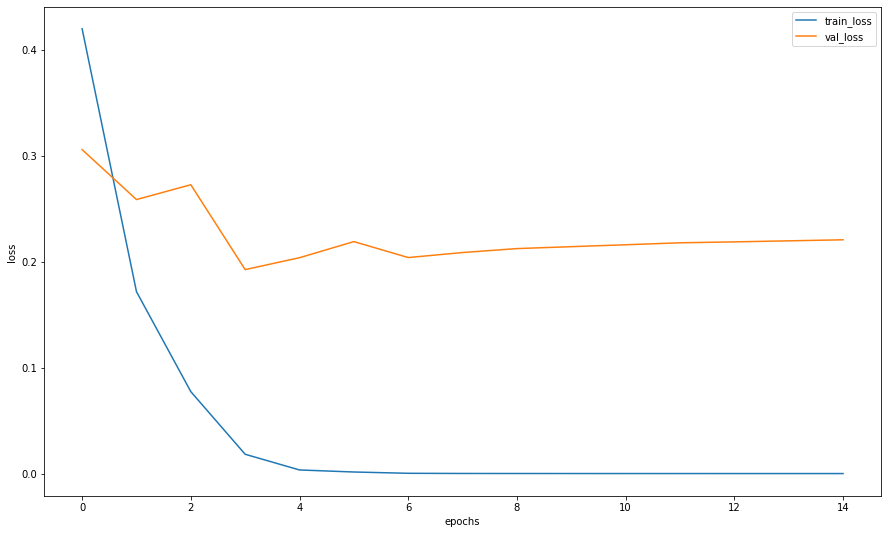

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### Ну и что теперь со всем этим делать?

![alt text](https://www.indiewire.com/wp-content/uploads/2014/08/the-simpsons.jpg)

Хорошо бы понять, как сделать сабмит. 
У нас есть сеть и методы eval у нее, которые позволяют перевести сеть в режим предсказания. Стоит понимать, что у нашей модели на последнем слое стоит softmax, которые позволяет получить вектор вероятностей  того, что объект относится к тому или иному классу. Давайте воспользуемся этим.

In [ ]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [ ]:
random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(myModel, ex_img.unsqueeze(0))

In [ ]:
idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(myModel, imgs)

In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [ ]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]

preds_class = [label_encoder.classes_[i] for i in y_pred]

In [ ]:
probs_ims

array([[5.86945856e-18, 2.14411903e-13, 1.81020411e-14, 4.54539745e-21,
        5.60078047e-19, 1.67987859e-17, 1.00000000e+00, 1.60304759e-19,
        6.38833469e-14, 1.58425221e-17, 3.29610341e-12, 5.40868484e-14,
        4.64539404e-17, 2.14613722e-12, 3.23552423e-14, 1.55578226e-15,
        2.14427529e-16, 2.45603225e-17, 1.02641533e-17, 1.12004840e-13,
        2.47755417e-16, 2.45648190e-17, 1.73192319e-15, 8.06262609e-13,
        5.77667619e-18, 1.19173118e-12, 2.66397126e-12, 2.70703497e-14,
        6.89562471e-19, 1.13163740e-21, 1.69403127e-15, 6.67432621e-14,
        6.39060473e-13, 4.61938517e-12, 3.56199547e-15, 6.23142234e-16,
        8.62336318e-17, 1.32638774e-15, 1.28221256e-14, 6.21032021e-14,
        1.55198792e-12, 1.13156489e-12],
       [1.62365035e-14, 4.52901794e-16, 5.65153511e-20, 3.61637803e-11,
        1.00000000e+00, 6.46170889e-16, 1.51447309e-19, 3.83385814e-12,
        2.49155155e-17, 1.31387598e-19, 3.66851901e-14, 1.26293435e-20,
        2.24302742e-16,

Обратите внимание, что метрика, которую необходимо оптимизировать в конкурсе --- f1-score. Вычислим целевую метрику на валидационной выборке.

In [ ]:
from sklearn.metrics import f1_score

#f1_score(actual_labels, preds_class)


Сделаем классную визуализацию,  чтобы посмотреть насколько сеть уверена в своих ответах. Можете исспользовать это, чтобы отлаживать правильность вывода.

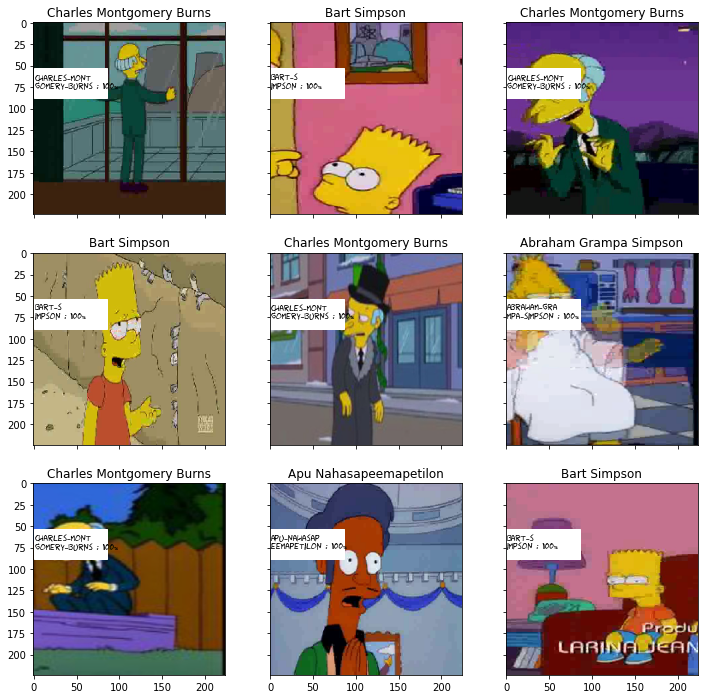

In [ ]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    
    

    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)
    
    actual_text = "Actual : {}".format(img_label)
            
    fig_x.add_patch(patches.Rectangle((0, 53),86,35,color='white'))
    font0 = FontProperties()
    font = font0.copy()
    font.set_family("fantasy")
    prob_pred = predict_one_sample(myModel, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)
    
    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)
            
    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

Попробуйте найти те классы, которые сеть не смогла расспознать. Изучите данную проблему, это понадобится в дальнейшем.

### Submit на Kaggle

![alt text](https://i.redd.it/nuaphfioz0211.jpg)

In [ ]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(myModel, test_loader)


preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]


In [ ]:
! ls 

characters_illustration.png  label_encoder.pkl	    testset
drive			     sample_data	    train
fourth.csv		     sample_submission.csv
journey-springfield.zip      second.csv


In [ ]:
import pandas as pd
# my_submit = pd.read_csv("sample_submission.csv")
my_submit = pd.DataFrame({'Image_id': test_filenames, 'Expected': preds})
# my_submit.head()

# ERROR: Unexpected Column:  'Image_id' (Line 1, Column 1)
# ERROR: Required column 'Id' could not be found
my_submit.columns = ['Id', 'Expected']
my_submit

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon
...,...,...
986,img987.jpg,nelson_muntz
987,img988.jpg,ned_flanders
988,img989.jpg,charles_montgomery_burns
989,img99.jpg,chief_wiggum


In [ ]:
# TODO : сделайте сабмит (это важно, если Вы не справляетесь, но дошли до этой ячейки, то сообщите в чат и Вам помогут)

In [ ]:
my_submit.to_csv('fifth.csv', index=False)

## Приключение?

А теперь самое интересное, мы сделали простенькую сверточную сеть и смогли отправить сабмит, но получившийся скор нас явно не устраивает. Надо с этим что-то сделать. 

Несколько срочныйх улучшейни для нашей сети, которые наверняка пришли Вам в голову: 


*   Учим дольше и изменяем гиперпараметры сети
*  learning rate, batch size, нормализация картинки и вот это всё
*   Кто же так строит нейронные сети? А где пулинги и батч нормы? Надо добавлять
*  Ну разве Адам наше все? [adamW](https://www.fast.ai/2018/07/02/adam-weight-decay/) для практика, [статейка для любителей](https://openreview.net/pdf?id=ryQu7f-RZ) (очень хороший анализ), [наши ](https://github.com/MichaelKonobeev/adashift/) эксперименты для заинтересованных.

* Ну разве это deep learning? Вот ResNet и Inception, которые можно зафайнтьюнить под наши данные, вот это я понимаю (можно и обучить в колабе, а можно и [готовые](https://github.com/Cadene/pretrained-models.pytorch) скачать).

* Данных не очень много, можно их аугументировать и  доучититься на новом датасете ( который уже будет состоять из, как  пример аугументации, перевернутых изображений)

* Стоит подумать об ансамблях


Надеюсь, что у Вас получится!

![alt text](https://pbs.twimg.com/profile_images/798904974986113024/adcQiVdV.jpg)
